---
title: "Analise de caso"
author: "Wallace"
date: "2023-10-09"
output: html_document
---


# Essa análise é a conclussão do curso de análise de dados, será mostrado o passo a passo, e como eu cheguei a conclusão.
## A analise é dividida em 7 passos.
1. Perguntar
2. Preparar
3. Processar
4. Analisar
5. Compartilhar
6. Agir

## 1 - Perguntar:
### O contexto será dado abaixo:
Você é um analista de dados júnior que trabalha na equipe de analistas de marketing da Cyclistic, uma empresa de compartilhamento de bicicletas em Chicago. O diretor de marketing acredita que o sucesso futuro da empresa depende da maximização do número de planos anuais contratados. Portanto, sua equipe quer entender como os ciclistas casuais e os membros anuais usam as bicicletas da Cyclistic de forma diferente. A partir desses insights, sua equipe criará uma nova estratégia de marketing para converter passageiros casuais em membros anuais. Mas, primeiro, os executivos da Cyclistic devem aprovar suas recomendações que, portanto, devem ser apoiadas com insights de dados convincentes e visualizações de dados profissionais.

### Perguntas geradas:
1.	Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
2.	Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?
3.	Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

## 2 - Preparar os dados:
Nesse ponto é importante verificar a origem dos dados, se podem conter algum erro ou algum viés, e claro, mantendo a privacidade do usuário, como os dados são gerados pela propría empresa, já temos uma maior confiança.
Os dados são retiradados deste [link](https://divvy-tripdata.s3.amazonaws.com/index.html)

## 3 - Processar os dados:
Finalmente iremos começar a programar, por enquanto só fazendo uma limpeza nos dados, adicionando alguns dados úteis e retirando alguns inúteis.ngan)

In [1]:
#Instalação de algumas bibliotecas
library(tidyverse)
library(ggplot2)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Agora vamos ler nossos arquivos e combina-los para ter uma maior facilidade no processo.

In [2]:
ago_2022 <- read.csv("/kaggle/input/cyclistic-bike-share/202104-divvy-tripdata.csv")
set_2022 <- read.csv("/kaggle/input/cyclistic-bike-share/202105-divvy-tripdata.csv")
out_2022 <- read.csv("/kaggle/input/cyclistic-bike-share/202106-divvy-tripdata.csv")
nov_2022 <- read.csv("/kaggle/input/cyclistic-bike-share/202107-divvy-tripdata.csv")
dez_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202108-divvy-tripdata.csv")
jan_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202109-divvy-tripdata.csv")
fev_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202110-divvy-tripdata.csv")
mar_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202111-divvy-tripdata.csv")
abr_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202112-divvy-tripdata.csv")
mai_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202201-divvy-tripdata.csv")
jun_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202202-divvy-tripdata.csv")
jul_2023 <- read.csv("/kaggle/input/cyclistic-bike-share/202203-divvy-tripdata.csv")

last_year <- rbind(ago_2022, set_2022, out_2022, nov_2022, dez_2023, jan_2023, fev_2023, mar_2023, abr_2023, mai_2023, jun_2023, jul_2023)
#Na primeira analise os dados foram retirados do site de forma atual, como não tenho acesso a esses dados pelo kaggle, utilizei os dados disponiveis no proprio kaggle.

### Para se ter um melhor noção dos nosso dados, haverá um pequeno baceçalho abaixo, e uma lista com nossos tipos de dados.

In [3]:
head(last_year)
str(last_year)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
2,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
3,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
4,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
5,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
6,097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


'data.frame':	5723532 obs. of  13 variables:
 $ ride_id           : chr  "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr  "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr  "2021-04-12 18:25:36" "2021-04-27 17:27:11" "2021-04-03 12:42:45" "2021-04-17 09:17:42" ...
 $ ended_at          : chr  "2021-04-12 18:56:55" "2021-04-27 18:31:29" "2021-04-07 11:40:24" "2021-04-17 09:42:48" ...
 $ start_station_name: chr  "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr  "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr  "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr  "13235" "KA1503000069" "20121" "13235" ...
 $ start_lat         : num  41.9 41.8 41.7 41.9 41.7 ...
 $ start_lng         : num

### Para melhor compreensão iremos mudar a nomenclatura de algumas colunas, e retirar as colunas (start_lat, start_lng, end_lat, end_lng) e faremos a conversão das nossas datas de str para datatime ou projectxct, conseguir usa-lá

In [4]:
last_year <- last_year %>% rename(trip_id = ride_id,
                                  bikeid= rideable_type,
                                  start_time = started_at,
                                  end_time = ended_at,
                                  from_station_name = start_station_name,
                                  from_station_id = start_station_id,
                                  to_station_name = end_station_name,
                                  to_station_id = end_station_id,
                                  usertype = member_casual)

last_year <- last_year %>%  
  subset(select = -c(start_lat, start_lng, end_lat, end_lng))

last_year <- last_year %>% 
  mutate(start_time = as_datetime(start_time), 
         end_time = as_datetime(end_time))

### Agora com nossos dados um pouco mais limpos, vamos criar mais algumas colunas para uma melhor análise, nesse caso criaremos uma coluna tour_duration com a duração das corridas e mais 3 outras que vão dividir as datas em ano, mês e dias da semana.

In [5]:
last_year <- last_year %>% 
  mutate(tour_duration = difftime(end_time, start_time))

#Criação de uma nova coluna com o dia da semana, sendo 1 - domingo e 7 - sabado, e os memes e anos normalmente.      
last_year <- last_year %>% 
  mutate(day_of_week = wday(start_time),
         rent_month = month(start_time),
         rent_year = year(start_time))

### Classificando os dados pela coluna tour_duration, percebeu que existiam muitos tempos negativos, o que gera uma inconssistencia nos dados, gerados por erros nas datas, como pode ser visto abaixo.

In [6]:
head(arrange(last_year, tour_duration))

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,usertype,tour_duration,day_of_week,rent_month,rent_year
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<dbl>,<dbl>,<dbl>
1,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,Halsted St & Dickens Ave,13192,,,casual,-3482 secs,1,11,2021
2,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,13128,Larrabee St & Webster Ave,13193,casual,-3354 secs,1,11,2021
3,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,13191,Sedgwick St & North Ave,TA1307000038,member,-3245 secs,1,11,2021
4,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,13243,Western Ave & Division St,13241,member,-3227 secs,1,11,2021
5,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,TA1309000023,Southport Ave & Wellington Ave,TA1307000006,casual,-3209 secs,1,11,2021
6,B506DCD44974C575,electric_bike,2021-11-07 01:53:34,2021-11-07 01:00:42,Milwaukee Ave & Fullerton Ave,428,,,casual,-3172 secs,1,11,2021


### Agora vamos retirar esses dados e verificar se existem duplicatas

In [7]:
#Verificação de duplicatas, não foi encontrada nenhuma
last_year <- unique.data.frame(last_year)
#Retirando tempos de alugueis negativos ou iguais a zero, numero de linhas atuais: 5723606
last_year <- subset(last_year, (tour_duration > 0))
#Numero de linhas atuais: 5722891, totalizando a retirada de 715 linhas

#verificando novamente
head(arrange(last_year, tour_duration))

,trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,usertype,tour_duration,day_of_week,rent_month,rent_year
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<dbl>,<dbl>,<dbl>
1,3F99442B76EC2051,classic_bike,2021-04-16 18:18:00,2021-04-16 18:18:01,Damen Ave & Cortland St,13133,Damen Ave & Cortland St,13133,member,1 secs,6,4,2021
2,2DC9DF08B3526631,classic_bike,2021-04-16 07:58:39,2021-04-16 07:58:40,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,member,1 secs,6,4,2021
3,08F12FCBFCB2E2AC,classic_bike,2021-04-04 23:19:08,2021-04-04 23:19:09,Millennium Park,13008,Millennium Park,13008,casual,1 secs,1,4,2021
4,FA298BEA9192285D,electric_bike,2021-04-07 20:14:21,2021-04-07 20:14:22,Damen Ave & Cortland St,13133,,,casual,1 secs,4,4,2021
5,2E3A71EA22386A96,electric_bike,2021-04-17 17:34:09,2021-04-17 17:34:10,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,member,1 secs,7,4,2021
6,83B251CA7B9F2B39,classic_bike,2021-04-18 15:42:44,2021-04-18 15:42:45,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,member,1 secs,1,4,2021


# Analise
### Abaixo temos alguns calculos que vamos usar futuramente

In [8]:
mean(last_year$tour_duration) #Duração média da corrida
median(last_year$tour_duration) #tempo da moda
max(last_year$tour_duration) #maior duração
min(last_year$tour_duration) #menor duração

Time difference of 1292.718 secs

Time difference of 703 secs

Time difference of 3356649 secs

Time difference of 1 secs

### Agora teremos alguns gráficos que irão gerar uma maior compreenssão dos nossos dados

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


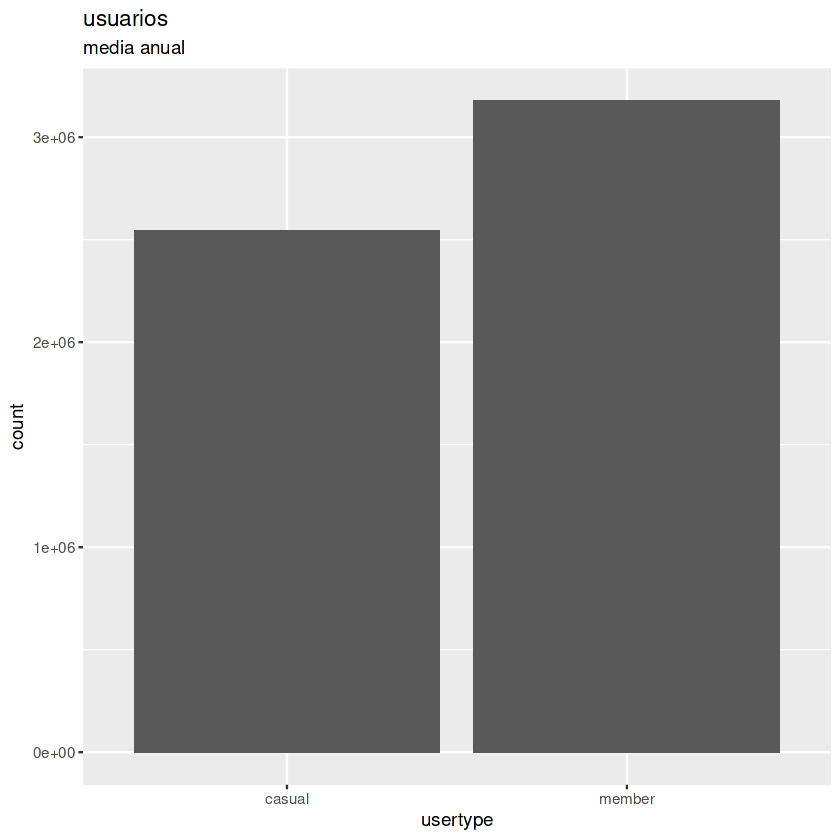

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


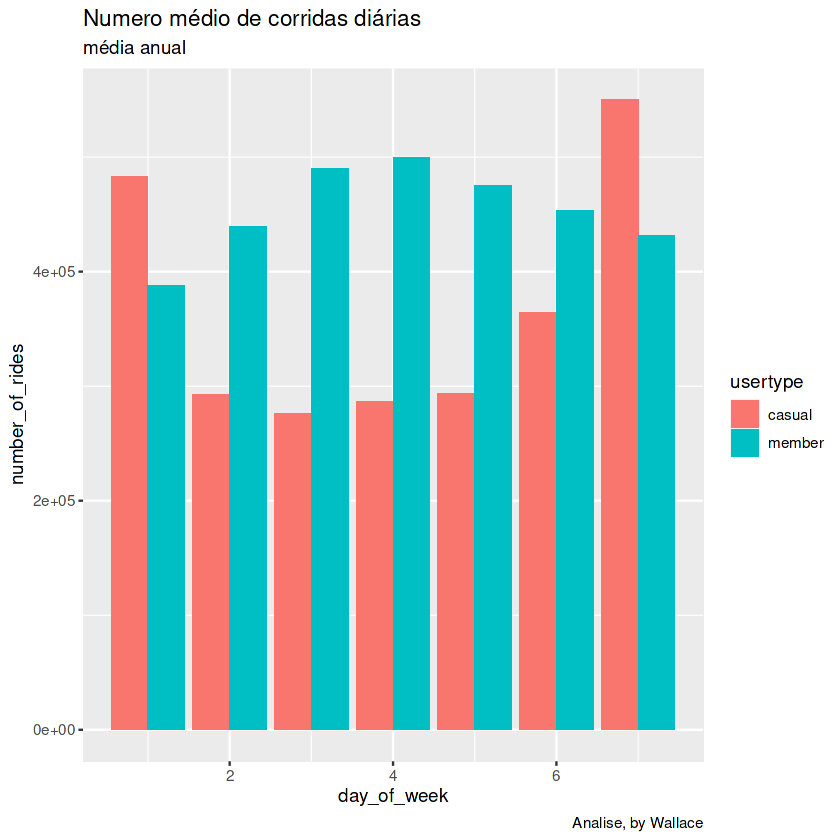

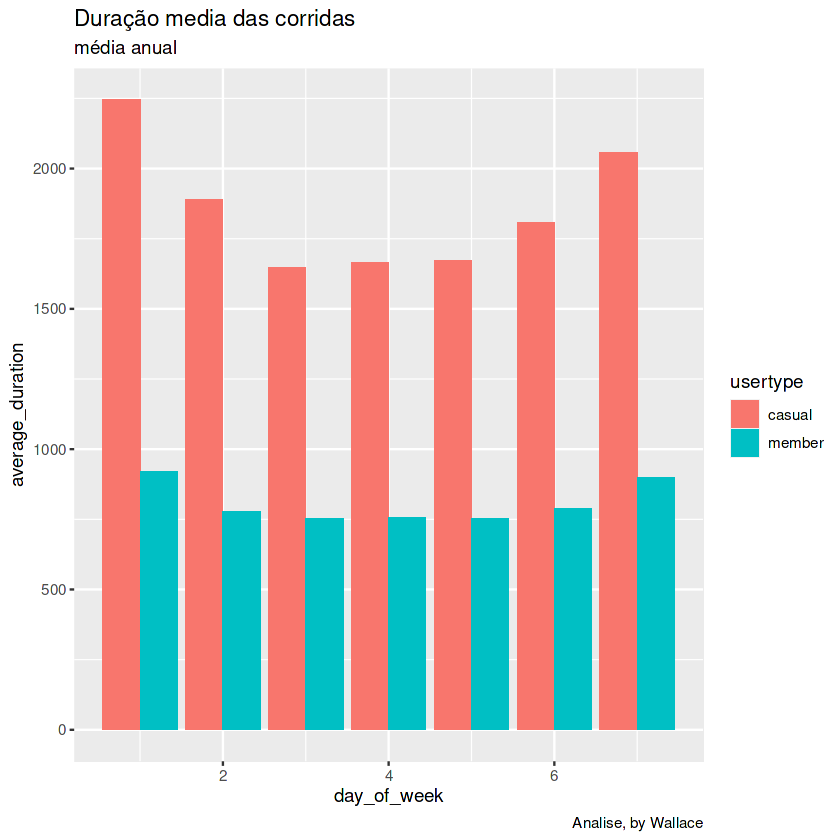

In [9]:

ggplot(data=last_year) + geom_bar(mapping = aes(x = usertype)) +
  labs(title = "usuarios",
       subtitle = "media anual")

last_year %>% 
  group_by(usertype, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(usertype, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = usertype)) +
  geom_col(position = "dodge") +
  labs(title="Numero médio de corridas diárias", 
       subtitle = "média anual",
       caption = "Analise, by Wallace")

last_year %>% 
  group_by(usertype, day_of_week) %>% 
  summarise(average_duration = mean(tour_duration)) %>% 
  arrange(usertype, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = usertype)) +
  geom_col(position = "dodge") +
  labs(title="Duração media das corridas", 
       subtitle = "média anual",
       caption = "Analise, by Wallace")

### O primeiro gráfico mostra a difença entre membro, sendo membros anuais com 62% e membros cauais com 38%, os membros anuais realizam mais corridas, porém com um duração menor, sendo associado ao uso do dia como transporte, e já os usuarios casuais a utilizam as utilizam menor, porém com um maior duração, isso indica que são longas viagens, algo relacionado ao esporte.

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


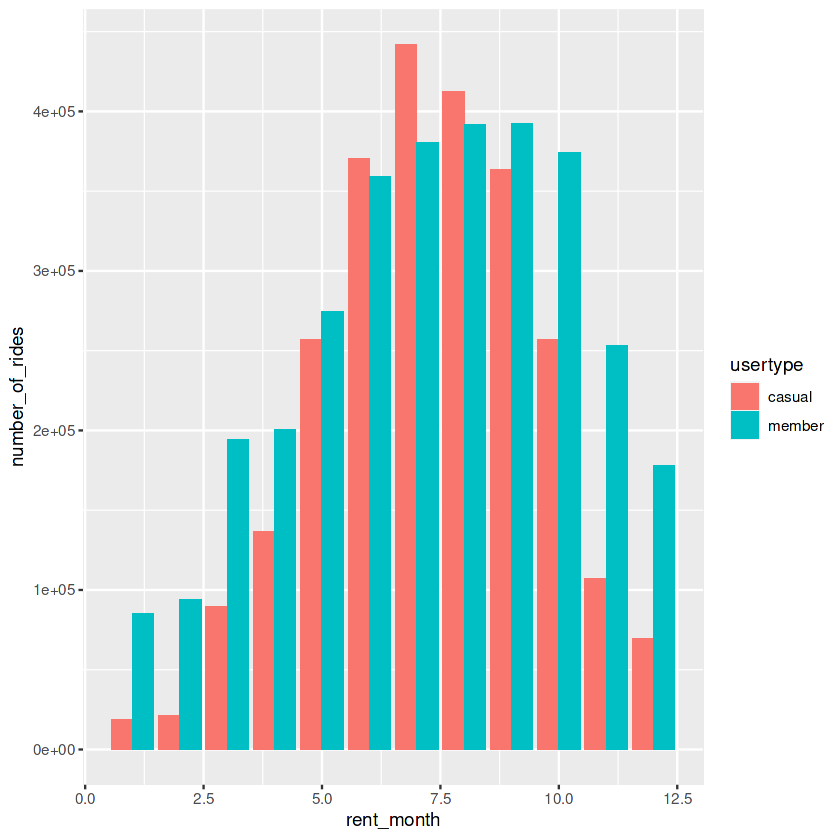

In [10]:
last_year %>% 
  group_by(usertype, rent_month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(usertype, rent_month)  %>% 
  ggplot(aes(x = rent_month, y = number_of_rides, fill = usertype)) +
  geom_col(position = "dodge")

# Compartilhar
### Nesse ponto é importante que minhas análises tenham sido vistas por outras pessoas de áreas proximas de onde os dados normalmente ficam, para assim dar outras ídeias ou ver alguma inconssistencia que posso não ter notado, como não tenho nada assim, só revisei por mim mesmo e criei uma apresentação de slides para exibir meus resultados, ela estará nesse [link](https://docs.google.com/presentation/d/1jCEmuuEz6afck4jiGPQwj45UG8TvRdDU6nnY7c-SQ-4/edit?usp=sharing).

# Agir
### Essa é uma parte em equipe, onde os insights retirados da análise irão ajudar a realizar decisões, algumas sugestões foram dadas:
1. Marketing sobre o uso de bicletas no dia a dia.
2. Fazer essa implementação nos meses centrais, devido o maior movimento.
3. Menos de 3% das bicletas alugadas são docked_bike, corrigatavel a retirada da mesma. 

### E outros dados foram apresentados para tomar decisões.
# Essa foi a minha análise, obrigado pela atenção.